**Import Modules**

In [1]:
from  sklearn.datasets import make_regression
import pandas as pd    
import numpy as np
from DGen import DGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import importlib
import DGen
importlib.reload(DGen)

<module 'DGen' from 'C:\\Users\\kofi_\\Documents\\GitHub\\supervised-cadres\\notebooks\\DGen.py'>

In [3]:
# imports from binary example 2
import sys
from scipy.stats import zscore, zmap
from sklearn.model_selection import train_test_split, KFold
from itertools import product
from joblib import Parallel, delayed
from multiprocessing import cpu_count

In [4]:
sys.path.insert(0, '../cadreModels/')
from classificationBinary2 import binaryCadreModel

**Generate Cadres**

In [6]:
df_cadre = DGen.DGenerator.generate_cadres(samples = 500, features = 10, informative = 5, cadres = 5, seed = 101)
df_cadre.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,cadre,index_c
0,-0.265349,-0.698617,0.665197,0.554398,-0.199260,0.615396,1.436502,-0.607462,-0.440538,-0.635455,0,0
1,-1.496778,-1.998597,0.153204,-3.240679,0.425230,2.389308,-1.241310,1.356522,2.869479,-0.645985,0,1
2,1.944101,0.453006,0.565069,-0.337456,2.032046,-3.151461,0.211682,-1.894892,-0.757797,-0.813394,0,2
3,-0.156267,0.111472,3.860805,2.780660,-0.399837,2.889739,-0.092546,-3.862675,-3.013021,-2.219374,0,3
4,0.414104,0.974049,0.205858,-2.132403,-0.734565,2.671381,0.696124,3.430824,2.781922,-0.077992,0,4


**Generate Features and DVs**

In [8]:
df_variables = DGenerator.generate_variables(cadres = 5, samples = 100, features = 5, classes= 2, informative = 3, seed = 10)
df_variables.head()

,dv0,dv1,dv2,dv3,dv4,target,cadre,index_c
0,2.204750,-0.334520,1.399043,0.833146,2.719191,0,0,0
1,0.295798,0.472396,-2.525445,-2.318118,-0.626782,0,0,1
2,-0.351001,-0.056448,-0.019186,0.029980,-0.310719,1,0,2
3,0.592100,0.597044,0.609850,0.636446,0.322715,1,0,3
4,0.423579,1.440724,1.594888,1.835560,-0.177855,1,0,4


In [10]:
z = pd.merge(df_cadre, df_variables)
z.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,cadre,index_c,dv0,dv1,dv2,dv3,dv4,target
0,-0.265349,-0.698617,0.665197,0.554398,-0.199260,0.615396,1.436502,-0.607462,-0.440538,-0.635455,0,0,2.204750,-0.334520,1.399043,0.833146,2.719191,0
1,0.934645,1.674789,2.987192,3.756811,-1.601679,2.120705,-2.719616,-0.969242,-2.714020,-1.297856,0,0,2.204750,-0.334520,1.399043,0.833146,2.719191,0
2,-1.496778,-1.998597,0.153204,-3.240679,0.425230,2.389308,-1.241310,1.356522,2.869479,-0.645985,0,1,0.295798,0.472396,-2.525445,-2.318118,-0.626782,0
3,1.944101,0.453006,0.565069,-0.337456,2.032046,-3.151461,0.211682,-1.894892,-0.757797,-0.813394,0,2,-0.351001,-0.056448,-0.019186,0.029980,-0.310719,1
4,-0.156267,0.111472,3.860805,2.780660,-0.399837,2.889739,-0.092546,-3.862675,-3.013021,-2.219374,0,3,0.592100,0.597044,0.609850,0.636446,0.322715,1


**Set up created dataframe for X features and y features from above**

In [27]:
X = z.drop(['target','cadre','index_c'], 1)
y = z['target']

**Begin SCM**

In [11]:
data = z.drop(['cadre','index_c'], 1)
data.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,dv0,dv1,dv2,dv3,dv4,target
0,-0.265349,-0.698617,0.665197,0.554398,-0.199260,0.615396,1.436502,-0.607462,-0.440538,-0.635455,2.204750,-0.334520,1.399043,0.833146,2.719191,0
1,0.934645,1.674789,2.987192,3.756811,-1.601679,2.120705,-2.719616,-0.969242,-2.714020,-1.297856,2.204750,-0.334520,1.399043,0.833146,2.719191,0
2,-1.496778,-1.998597,0.153204,-3.240679,0.425230,2.389308,-1.241310,1.356522,2.869479,-0.645985,0.295798,0.472396,-2.525445,-2.318118,-0.626782,0
3,1.944101,0.453006,0.565069,-0.337456,2.032046,-3.151461,0.211682,-1.894892,-0.757797,-0.813394,-0.351001,-0.056448,-0.019186,0.029980,-0.310719,1
4,-0.156267,0.111472,3.860805,2.780660,-0.399837,2.889739,-0.092546,-3.862675,-3.013021,-2.219374,0.592100,0.597044,0.609850,0.636446,0.322715,1


In [12]:
Dtr, Dva = train_test_split(data, test_size=0.2, random_state=1515)

In [13]:
cadreFts = data.columns[data.columns.str.contains('cad')]
predictFts = data.columns[data.columns.str.contains('dv')]

In [14]:
print(cadreFts)

Index(['cad0', 'cad1', 'cad2', 'cad3', 'cad4', 'cad5', 'cad6', 'cad7', 'cad8',
       'cad9'],
      dtype='object')


In [15]:
print(predictFts)

Index(['dv0', 'dv1', 'dv2', 'dv3', 'dv4'], dtype='object')


In [16]:
features = cadreFts.union(predictFts)

In [17]:
Dva[features] = zmap(Dva[features].values, Dtr[features].values)
Dtr[features] = zscore(Dtr[features].values)

In [18]:
Dva.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,dv0,dv1,dv2,dv3,dv4,target
193,1.054580,0.541057,-0.011550,1.049083,-0.668943,-1.167240,0.453071,1.419604,-0.295802,0.075070,-0.204051,-0.934147,1.120814,0.181931,0.163289,1
126,-1.541615,2.265613,0.063271,-0.390134,-0.237230,0.794465,-0.517872,0.843512,0.290082,1.078495,-2.341611,1.569792,1.955623,1.158289,-0.337793,1
133,1.358527,0.347159,-1.394630,1.241749,-1.155359,-0.529698,-1.582213,-0.916003,-0.452691,-0.965873,-1.540202,1.027945,0.973038,-0.309553,0.728177,1
103,-0.262154,0.325114,0.005798,0.337599,0.246513,-0.053190,-1.364018,-1.485352,-0.663218,-0.552980,0.464882,0.610605,-1.469469,-1.160526,0.416622,0
239,0.713796,1.232454,-2.058551,-0.391227,-1.495180,1.269464,-0.617333,0.929786,0.828663,1.826519,0.770559,0.143201,-0.363373,1.017959,-0.225955,0


In [19]:
scm = binaryCadreModel(M=5, Tmax=1001, record=10)
scm.fit(data=Dtr,
       targetCol='target',
       cadreFts=cadreFts,
       predictFts=predictFts,
       dataVa=Dva,
       progress=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
0
10 0.8147421 0.5275 0.8081238 0.49 0.24788451194763184
20 0.8102255 0.525 0.8048214 0.54 0.9779016971588135
30 0.8079586 0.53 0.80319834 0.53 1.1138238906860352
40 0.80619144 0.535 0.80213577 0.54 1.252744197845459
50 0.804641 0.54 0.8011758 0.54 1.3846700191497803
60 0.8032531 0.53 0.8002469 0.54 1.5205938816070557
70 0.80202246 0.53 0.7994817 0.52 1.6485185623168945
80 0.8009143 0.5325 0.7987434 0.52 1.7774450778961182
90 0.7998455 0.5325 0.79789877 0.52 1.9013750553131104
100 0.798903 0.535 0.7972233 0.52 2.030301809310913
110 0.7980697 0.535 0.7965435 0.52 2.1552302837371826
120 0.79724884 0.535 0.79591966 0.52 2.284156322479248
130 0.7964615 0.5325 0.7952686 0.52 2.4140822887420654
140 0.7957447 0.5275 0.79466134 0.53 2.5450072288513184
150 0.7950564 0.53 0.7941698 0.52 2.669935464859009
160 0.79438204 0.53 0.7936718 0.52 2.7988622188568115
170 0.79375404 0.53 

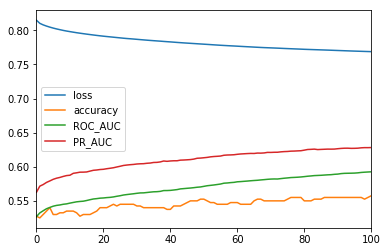

In [20]:
scm.metrics['training'].plot()

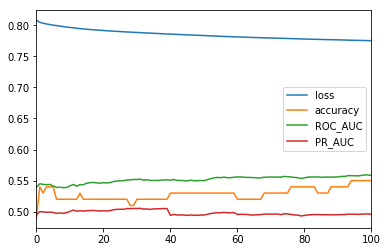

In [21]:
scm.metrics['validation'].plot()

In [22]:
scm.W

,0,1,2,3,4
dv0,0.140073,0.158931,0.140014,0.002801,-0.000017
dv1,0.003535,-0.105100,-0.033859,0.026087,0.003461
dv2,-0.038691,-0.000031,0.034541,-0.000022,0.024112
dv3,-0.006652,-0.026389,-0.036074,-0.003159,0.011861
dv4,0.226112,-0.057229,-0.032269,0.037732,-0.000008


In [23]:
scm.C

,0,1,2,3,4
cad0,-0.169165,0.154247,-0.015151,0.052770,-0.106699
cad1,-0.048068,-0.020001,-0.104588,0.144842,-0.042553
cad2,-0.071145,-0.092351,0.270329,0.211835,0.099671
cad3,0.199965,0.139280,-0.005253,0.033584,0.042242
cad4,-0.068846,0.024153,-0.065906,-0.124816,-0.041446
cad5,0.058911,-0.093506,0.080231,0.069900,-0.056518
cad6,0.099475,0.010686,0.113494,0.063230,-0.100702
cad7,0.149329,-0.216276,-0.007119,0.090661,-0.143154
cad8,-0.022167,-0.085508,-0.040333,0.162495,0.076904
cad9,-0.048010,-0.142741,-0.069377,0.029982,0.092306


In [24]:
scm.proportions.head()

,0,1,2,3,4
0,0.2350,0.2500,0.2475,0.2250,0.0425
1,0.2275,0.2525,0.2525,0.2175,0.0500
2,0.2275,0.2525,0.2525,0.2150,0.0525
3,0.2350,0.2450,0.2550,0.2150,0.0500
4,0.2375,0.2425,0.2525,0.2150,0.0525


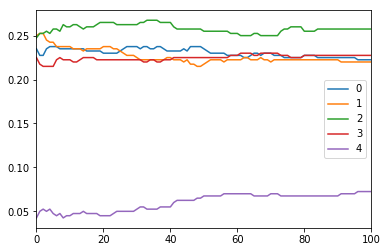

In [25]:
scm.proportions.plot()

In [26]:
margin, label, cadre_weight, cadre, loss = scm.predictFull(Dva)

In [27]:
scm.scoreMetrics(Dva)

,loss,accuracy,ROC_AUC,PR_AUC
0,0.732561,0.55,0.558374,0.496013
